In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("D:\HUS\Computer Vision\Lab1\phim6page4_3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def log_transformation(image: np.ndarray) -> np.ndarray:
    image = image.astype(np.float32)
    c = 255 / np.log(1 + np.max(image))
    log_image = c * np.log(1 + image)
    log_image = np.array(log_image, dtype=np.uint8)
    return log_image

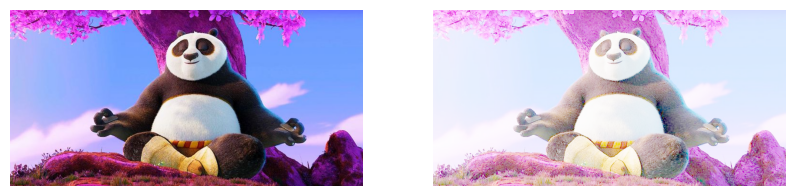

In [57]:
log_img = log_transformation(img)
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(log_img, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
def gamma_correction(image: np.ndarray, gamma: float) -> np.ndarray:
    nomarl = image/255.0
    correct = np.power(nomarl, gamma)
    correct = np.clip(correct * 255, 0, 255).astype(np.uint8)
    return correct

(np.float64(-0.5), np.float64(735.5), np.float64(367.5), np.float64(-0.5))

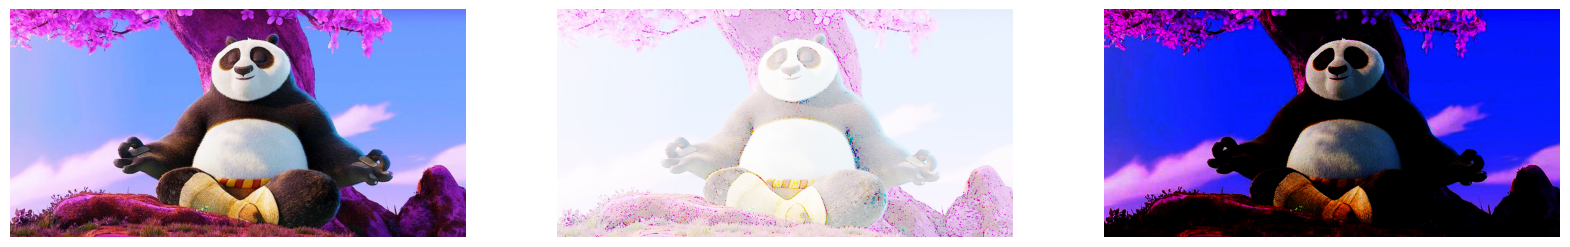

In [55]:
gamma1 = gamma_correction(img, 0.1)
gamma2 = gamma_correction(img, 5.0)

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gamma1, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gamma2, cmap='gray')
plt.axis('off')

In [9]:
def constrast_stretching(image: np.ndarray, max_val: int, min_val: int) -> np.ndarray:
    fmin, fmax = np.min(image), np.max(image)
    if fmax == fmin : 
        return np.full_like(image, min_val, dtype=np.uint8)
    g = (image.astype(np.float32)-fmin) / (fmax - fmin) * (max_val- min_val) + min_val
    return np.clip(g, min_val, max_val).astype(np.uint8)

(np.float64(-0.5), np.float64(735.5), np.float64(367.5), np.float64(-0.5))

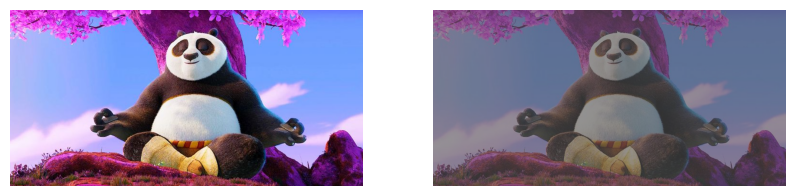

In [ ]:
stretched = constrast_stretching(img, 150, 50)

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(stretched, cmap='gray')
plt.axis('off')

In [12]:
def intensity_level_slicing(image: np.ndarray, a: int, b: int) -> np.ndarray:
    img1 = image.copy()
    if len(img1.shape) == 3 :
        img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    sliced = np.zeros_like(img1)
    mask = (img1 >= a) & (img1 <= b)
    sliced[mask] = 255
    return sliced

(np.float64(-0.5), np.float64(735.5), np.float64(367.5), np.float64(-0.5))

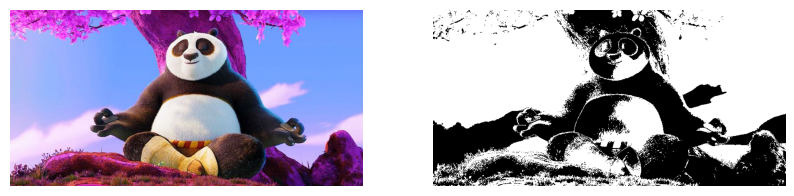

In [53]:
sliced_img = intensity_level_slicing(img, 70, 200)

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sliced_img, cmap='gray')
plt.axis('off')


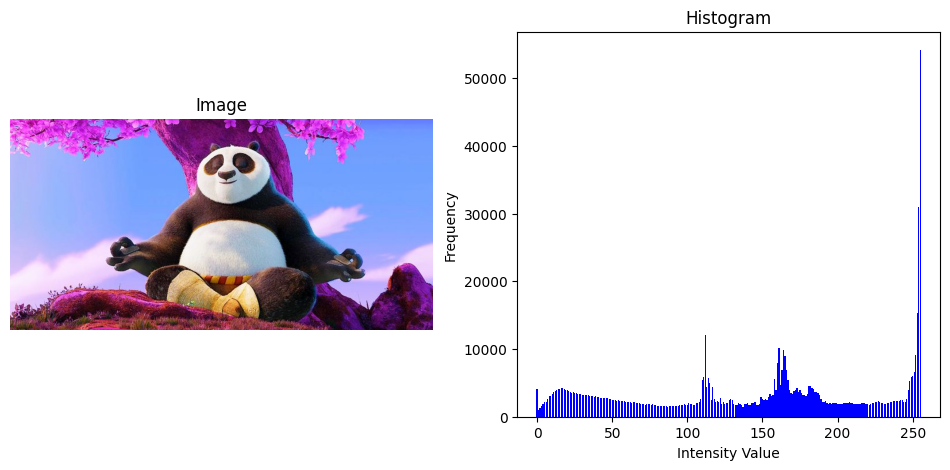

In [38]:
def panda_hist(img : np.ndarray) -> np.ndarray:
    hist = {x:0 for x in range(256)}
    for i in img.ravel():
        hist[i] += 1
    return hist
hist = panda_hist(img)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Histogram')
plt.bar(hist.keys(), hist.values(), color='blue')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

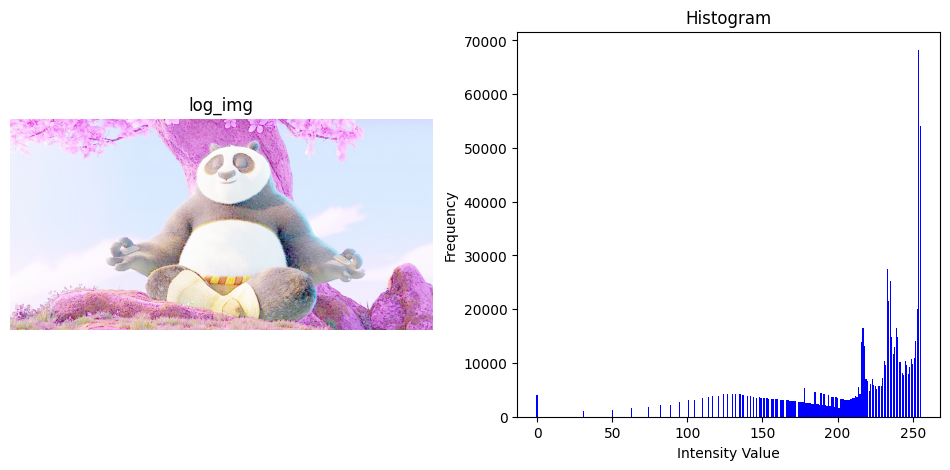

In [40]:
hist = panda_hist(log_img)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('log_img')
plt.imshow(log_img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Histogram')
plt.bar(hist.keys(), hist.values(), color='blue')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

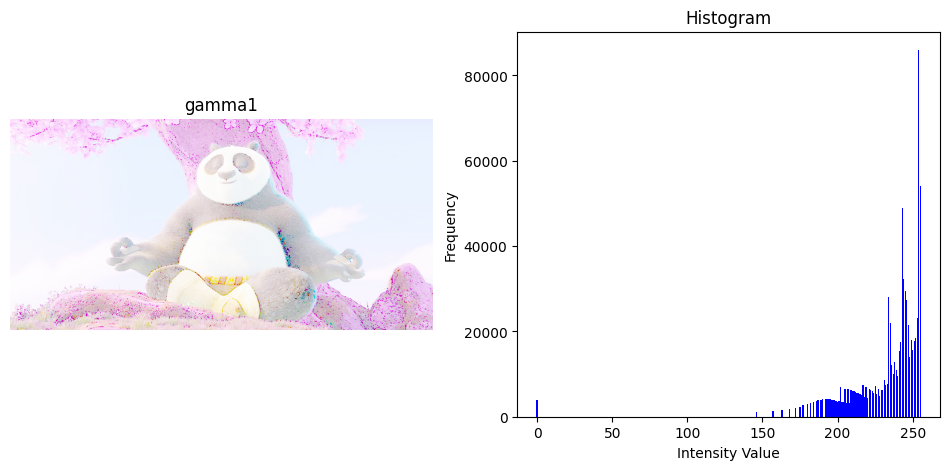

In [39]:
hist = panda_hist(gamma1)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('gamma1')
plt.imshow(gamma1, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Histogram')
plt.bar(hist.keys(), hist.values(), color='blue')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

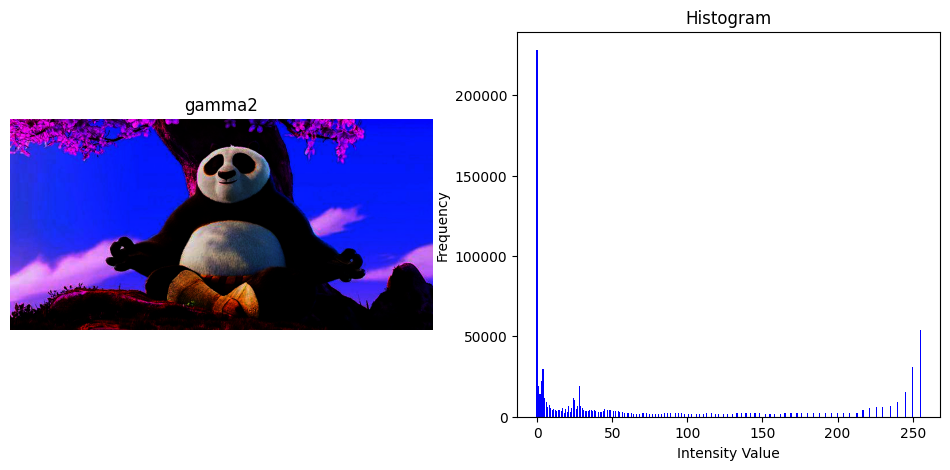

In [41]:
hist = panda_hist(gamma2)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('gamma2')
plt.imshow(gamma2, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Histogram')
plt.bar(hist.keys(), hist.values(), color='blue')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

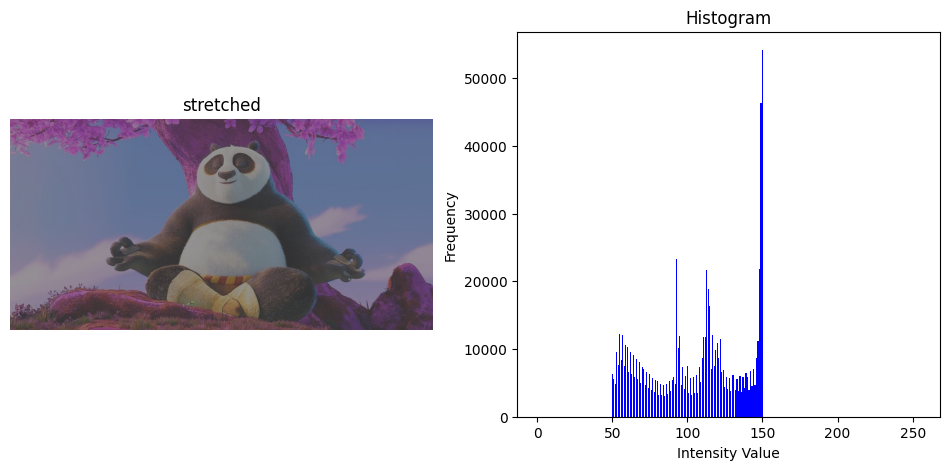

In [42]:
hist = panda_hist(stretched)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('stretched')
plt.imshow(stretched, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Histogram')
plt.bar(hist.keys(), hist.values(), color='blue')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

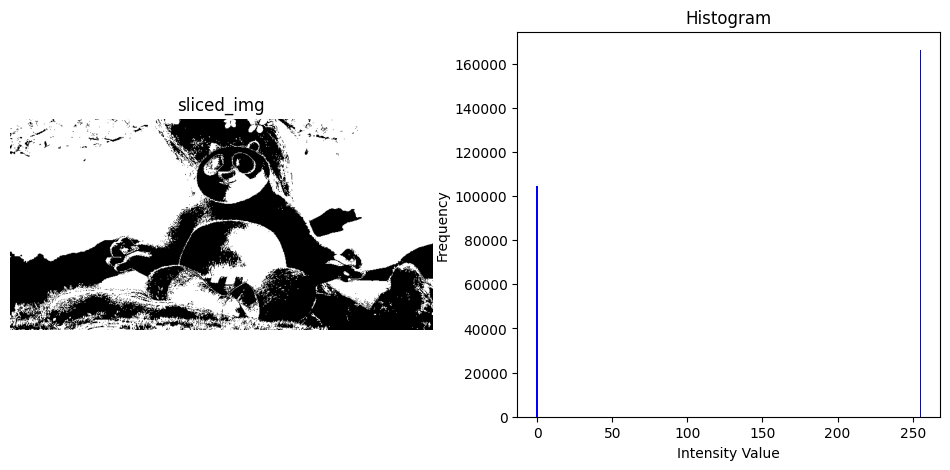

In [43]:
hist = panda_hist(sliced_img)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('sliced_img')
plt.imshow(sliced_img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Histogram')
plt.bar(hist.keys(), hist.values(), color='blue')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

In [45]:
def histogram_equalization(image: np.ndarray) -> np.ndarray:
    if len(image.shape) == 3 :
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    hist, _ = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    img2 = cdf[image]
    return img2

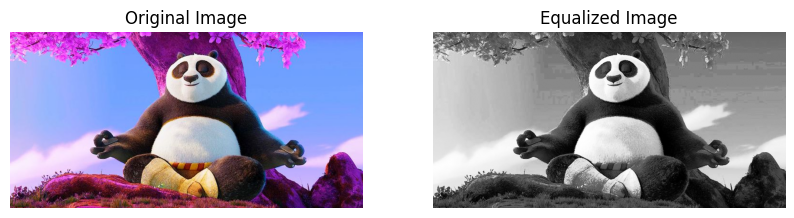

In [46]:
img_eq = histogram_equalization(img)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Equalized Image")
plt.imshow(img_eq, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# !pip install scikit-image


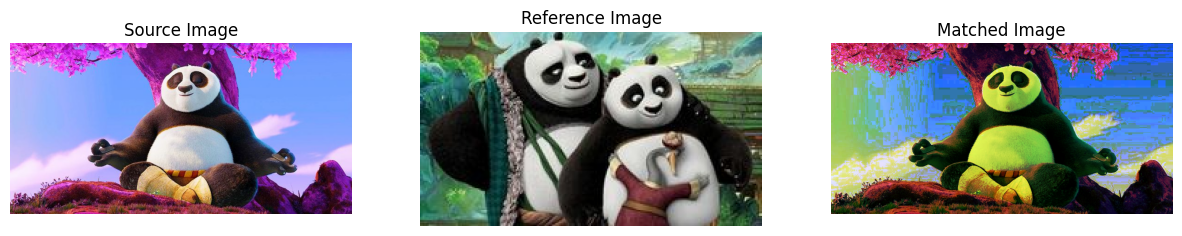

In [ ]:
from skimage import exposure

src = cv2.imread("D:\HUS\Computer Vision\Lab1\phim6page4_3.jpg")
src = src[:, :, ::-1]
ref = cv2.imread("D:\HUS\Computer Vision\Lab1\phim6page4_1.jpg")
ref = ref[:, :, ::-1]
output = exposure.match_histograms(src, ref, channel_axis=2)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Source Image")
plt.imshow(src)
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Reference Image")
plt.imshow(ref)
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Matched Image")
plt.imshow(output)
plt.axis('off')

plt.show()


In [70]:
def blur_image(image: np.ndarray, ksize: int) -> np.ndarray:
    mean_blur = cv2.blur(image, (ksize, ksize))
    gaussian_blur = cv2.GaussianBlur(image, (ksize, ksize), 0)
    median_blur = cv2.medianBlur(image, ksize)
    return mean_blur, gaussian_blur, median_blur

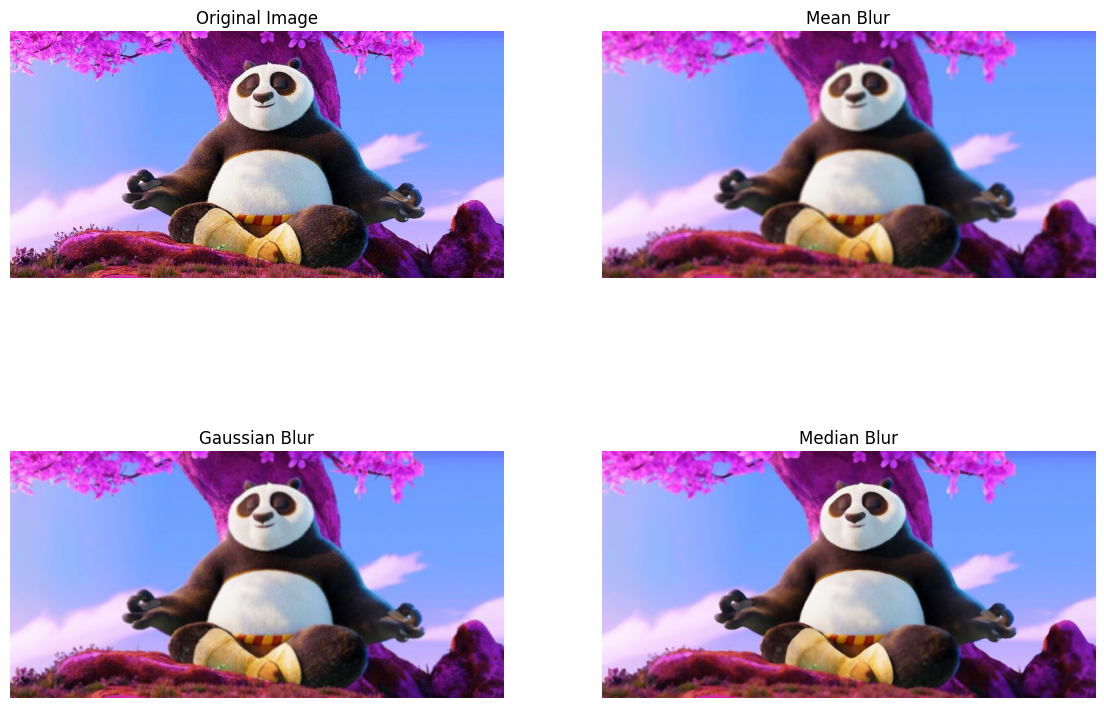

In [71]:
mean_img, gaussian_img, median_img = blur_image(img, 5)

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title("Mean Blur")
plt.imshow(mean_img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title("Gaussian Blur")
plt.imshow(gaussian_img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title("Median Blur")
plt.imshow(median_img, cmap='gray')
plt.axis('off')
plt.show()

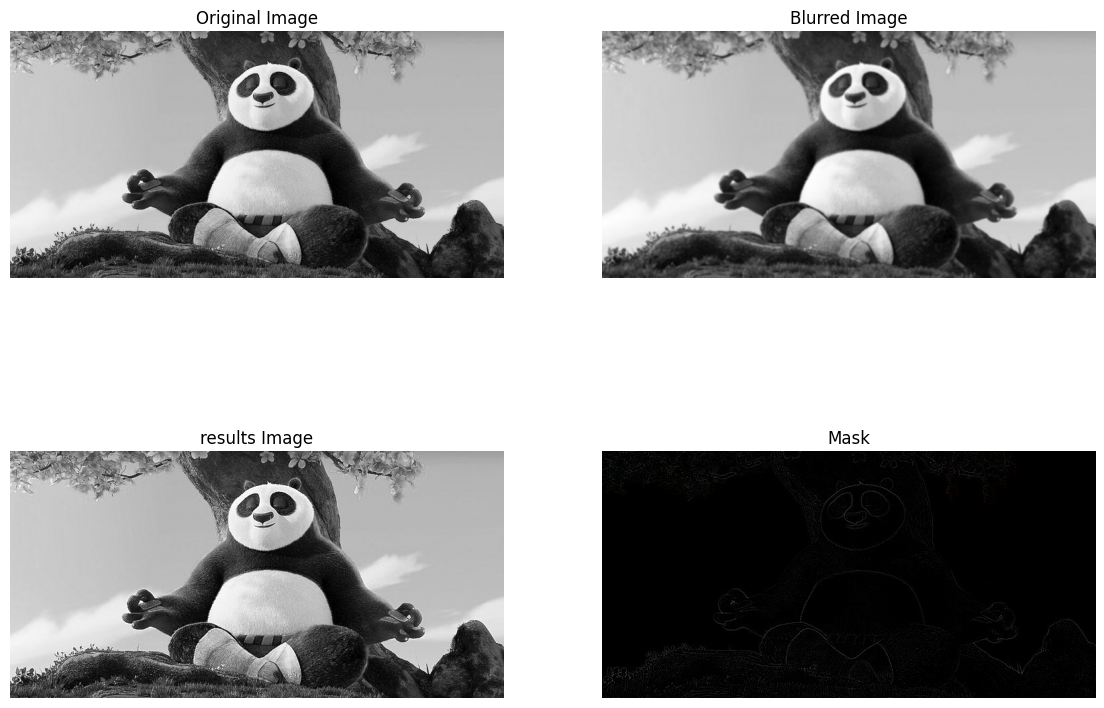

In [82]:
def spatial_filtering(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    mask = cv2.subtract(image, blurred)
    results = cv2.add(image, mask)
    return blurred, mask, results
blurred_img, mask, results_img = spatial_filtering(img, None)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred_img = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2GRAY)
results_img = cv2.cvtColor(results_img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.subplot(2,2,2)
plt.title("Blurred Image")
plt.imshow(blurred_img, cmap='gray')
plt.axis('off')
plt.subplot(2,2,3)
plt.title("results Image")
plt.imshow(results_img, cmap='gray')
plt.axis('off')
plt.subplot(2,2,4)
plt.title("Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()